In [22]:
import sys
print(sys.executable)

/Users/martacaninoromero/DarkMatter_ML_TFG/.venv/bin/python


In [23]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [24]:
#set matplotlib style
plt.rcParams['figure.figsize'] = (6, 5)  # Set figure size
plt.rcParams['axes.labelsize'] = 18  # fontsize of the x any y labels
plt.rcParams['xtick.labelsize'] = 16  # fontsize of the tick labels
plt.rcParams['ytick.labelsize'] = 16  # fontsize of the tick labels
plt.rcParams['xtick.direction'] = 'in'  # direction: in, out, or inout
plt.rcParams['ytick.direction'] = 'in'  # direction: in, out, or inout
plt.rcParams['xtick.major.size'] = 6  # size of tick marks
plt.rcParams['ytick.major.size'] = 6  # size of tick marks
plt.rcParams['xtick.minor.size'] = 3  # size of tick marks
plt.rcParams['ytick.minor.size'] = 3  # size of tick marks
plt.rcParams['xtick.major.pad'] = 7  # distance between ticks and tick labels
plt.rcParams['ytick.major.pad'] = 7  # distance between ticks and tick labels
plt.rcParams['axes.grid'] = True  # Turn grid on by default
plt.rcParams['grid.alpha'] = 0.5  # Set grid transparency to 0.5
plt.rcParams['legend.fontsize'] = 16  # fontsize of the legend

In [25]:
# read back the data
fname = "tables/catalog_data_4FGL_DR4.h5"
with h5py.File(fname, "r") as f:
    E0 = f.attrs["E0"]
    alpha_unas = f["unas"]["alpha"][:] # a dataset inside "unas" group
    beta_unas = f["unas"]["beta"][:]
    flux_unas = f["unas"]["flux"][:]
    alpha_as = f["assoc"]["alpha"][:] # reads from group "assoc"
    beta_as = f["assoc"]["beta"][:]
    flux_as = f["assoc"]["flux"][:]

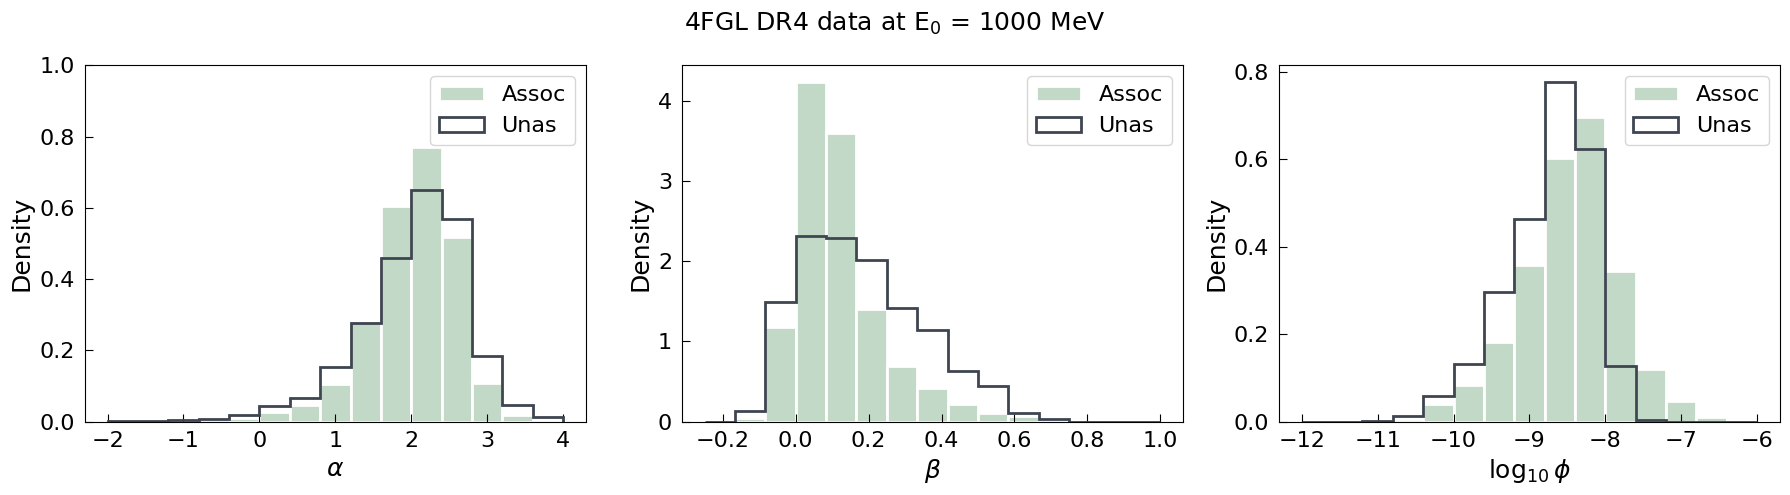

In [26]:
# plot the histograms of as vs unas for alpha and beta in two vertical panels
# fig, axs = plt.subplots(2, 1, figsize=(6, 10))
fig, axs = plt.subplots(1, 3, figsize=(3*6, 1*5))

nbins = 15

unas_color = "#3e4550"
as_color = "#c2d9c7"

fig.suptitle(r"4FGL DR4 data at E$_0$ = {:.0f} MeV".format(E0), fontsize=18)

range0_full = [-2, 4]
range1_full = [-0.25, 1.0]
range2_full = [-12, -6]

axs[0].hist(alpha_as, bins=nbins, range=range0_full, color=as_color,edgecolor="white", label="Assoc", lw=2, density=True)
axs[0].hist(alpha_unas, bins=nbins, range=range0_full, histtype='step', edgecolor=unas_color, label="Unas", lw=2, density=True)

axs[0].set_xlabel(r"$\alpha$")
axs[0].set_ylabel("Density")
axs[0].legend()
axs[0].grid(0)
axs[0].set_ylim((0, 1.0))

axs[1].hist(beta_as, bins=nbins, range=range1_full, color=as_color,edgecolor="white", label="Assoc", lw=2, density=True)
axs[1].hist(beta_unas, bins=nbins, range=range1_full, histtype='step', edgecolor=unas_color, label="Unas", lw=2, density=True)
axs[1].set_xlabel(r"$\beta$")
axs[1].set_ylabel("Density")
axs[1].legend()
axs[1].grid(0)

axs[2].hist(flux_as, bins=nbins, range=range2_full, color=as_color,edgecolor="white", label="Assoc", lw=2, density=True)
axs[2].hist(flux_unas, bins=nbins, range=range2_full, histtype='step', edgecolor=unas_color, label="Unas", lw=2, density=True)
axs[2].set_xlabel(r"$\log_{10} \phi$")
axs[2].set_ylabel("Density")
axs[2].legend()
axs[2].grid(0)

plt.tight_layout()
plt.show()